<a href="https://colab.research.google.com/github/melipass/pcp-datos-cosmologicos/blob/main/share_sesion2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<img src="https://habrastorage.org/webt/jq/gc/r5/jqgcr5azmatev6zvgufn8xftehy.png">
    

    
# Análisis de datos cosmológicos y el problema de la constante de Hubble usando Python

### Autor: David F. Camarena Torres

# <center> Sesión 2.1 Selección de modelos y Teoría de perturbaciones   

# Outline
1. [Seleccion de modelos](#1.-Seleccion)
2. [Teoria de perturaciones](#2.-Perturbaciones)

## 1.-Seleccion

Calcular AIC, BIC, y $B_{01}$ para $\mathcal{M}_0$: cosmografia con $H_0$, $q_0$ libre y $\mathcal{M}_1$: cosmografia con $H_0$ libre y $q_0 = 0.$

## 2.-Pertubaciones

### 2.a-CMB

In [ ]:
! pip install classy
from classy import Class

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = '18'

In [ ]:
! wget https://irsa.ipac.caltech.edu/data/Planck/release_3/ancillary-data/cosmoparams/COM_PowerSpect_CMB-TT-full_R3.01.txt
! wget https://irsa.ipac.caltech.edu/data/Planck/release_3/ancillary-data/cosmoparams/COM_PowerSpect_CMB-base-plikHM-TTTEEE-lowl-lowE-lensing-minimum-theory_R3.01.txt
! sed -i 's/#/ /' *

--2021-05-16 15:49:25--  https://irsa.ipac.caltech.edu/data/Planck/release_3/ancillary-data/cosmoparams/COM_PowerSpect_CMB-TT-full_R3.01.txt
Resolving irsa.ipac.caltech.edu (irsa.ipac.caltech.edu)... 134.4.54.87
Connecting to irsa.ipac.caltech.edu (irsa.ipac.caltech.edu)|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170547 (167K) [text/plain]
Saving to: ‘COM_PowerSpect_CMB-TT-full_R3.01.txt.2’

COM_PowerSpect_CMB- 100%[===================>] 166.55K   252KB/s    in 0.7s    

2021-05-16 15:49:27 (252 KB/s) - ‘COM_PowerSpect_CMB-TT-full_R3.01.txt.2’ saved [170547/170547]

--2021-05-16 15:49:27--  https://irsa.ipac.caltech.edu/data/Planck/release_3/ancillary-data/cosmoparams/COM_PowerSpect_CMB-base-plikHM-TTTEEE-lowl-lowE-lensing-minimum-theory_R3.01.txt
Resolving irsa.ipac.caltech.edu (irsa.ipac.caltech.edu)... 134.4.54.87
Connecting to irsa.ipac.caltech.edu (irsa.ipac.caltech.edu)|134.4.54.87|:443... connected.
HTTP request sent, awaiting response.

In [ ]:
import pandas as pd
input_cl_data = pd.read_csv("COM_PowerSpect_CMB-TT-full_R3.01.txt",delim_whitespace=True)
input_cl = pd.read_csv("COM_PowerSpect_CMB-base-plikHM-TTTEEE-lowl-lowE-lensing-minimum-theory_R3.01.txt",delim_whitespace=True)


input_cl_data.head()

,l,Dl,-dDl,+dDl
0,2.0,225.895,132.369,533.062
1,3.0,936.920,450.471,1212.308
2,4.0,692.238,294.111,666.469
3,5.0,1501.705,574.432,1155.804
4,6.0,557.611,201.242,375.763


In [ ]:
input_cl.head()

,L,TT,TE,EE,BB,PP
0,2,1016.730,2.61753,0.030883,0.000002,5.013520e-08
1,3,963.727,2.93806,0.039690,0.000004,6.099430e-08
2,4,912.608,2.75866,0.034496,0.000006,7.025920e-08
3,5,874.477,2.35185,0.023094,0.000009,7.829210e-08
4,6,848.509,1.89605,0.012951,0.000013,8.530200e-08


Text(0, 0.5, '$\\ell (\\ell+1) C_l^{TT} / 2 \\pi \\,\\,\\, [\\times 10^{10}]$')

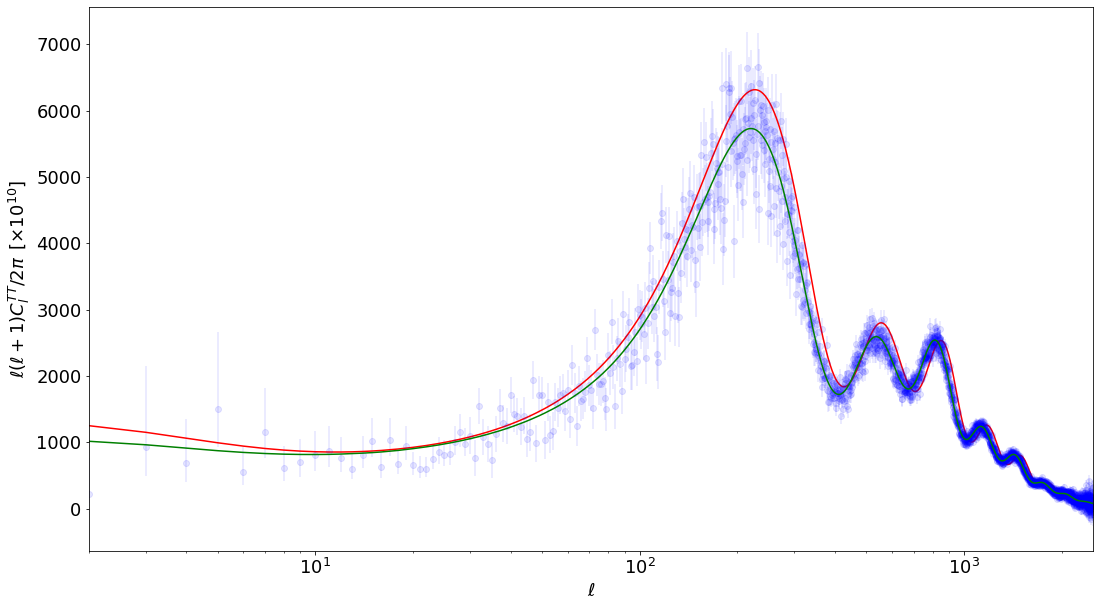

In [ ]:
LCDM = Class()
LCDM.set({'Omega_cdm':0.2,'Omega_b':0.05,'h':0.6727,'output':'tCl,pCl,lCl,mPk','l_max_scalars':3000,'lensing':'yes'}) # 265
LCDM.compute()
T_cmb = LCDM.T_cmb()

cl_tot = LCDM.raw_cl(3000)
factor = 1e12*T_cmb**2*cl_tot['ell']*(cl_tot['ell']+1.)/2./np.pi
error_to_plot = np.transpose(np.c_[input_cl_data['-dDl'],input_cl_data['+dDl']])

fig = plt.figure(figsize=(18,10))
plt.errorbar(input_cl_data['l'], input_cl_data['Dl'], error_to_plot, color='blue',marker='o',ls=' ',alpha=0.1)
plt.semilogx(cl_tot['ell'], factor*cl_tot['tt'], color='red',label='CLASS')
plt.errorbar(input_cl['L'], input_cl['TT'], color='green',label='Planck Bestfit')

plt.xlim([2, 2500]);

plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_l^{TT} / 2 \pi \,\,\, [\times 10^{10}]$")

In [ ]:
! pip install healpy
import healpy as hp

import warnings
warnings.filterwarnings("ignore")


     |████████████████████████████████| 15.8MB 260kB/s 


In [ ]:
cl.head()

,L,TT,TE,EE,BB,PP
1,9.424778e-12,3.027638e-09,9.230188e-12,1.246908e-13,1.142732e-17,1.916192e-19
2,4.188790e-12,9.556809e-10,2.888862e-12,3.612434e-14,6.349630e-18,7.357526e-20
3,2.617994e-12,4.578751e-10,1.231426e-12,1.209204e-14,4.763267e-18,4.099365e-20
4,1.884956e-12,2.665670e-10,5.956617e-13,4.068739e-15,4.002201e-18,2.679841e-20
5,1.466077e-12,1.742708e-10,3.121968e-13,1.466123e-15,3.558587e-18,1.915814e-20


In [ ]:
lmax = input_cl.index[-1]
cl = input_cl.divide(input_cl.index * (input_cl.index+1) / (np.pi*2), axis="index")
cl /= 1e12
cl.head()

,L,TT,TE,EE,BB,PP
0,inf,inf,inf,inf,inf,inf
1,9.424778e-12,3.027638e-09,9.230188e-12,1.246908e-13,1.142732e-17,1.916192e-19
2,4.188790e-12,9.556809e-10,2.888862e-12,3.612434e-14,6.349630e-18,7.357526e-20
3,2.617994e-12,4.578751e-10,1.231426e-12,1.209204e-14,4.763267e-18,4.099365e-20
4,1.884956e-12,2.665670e-10,5.956617e-13,4.068739e-15,4.002201e-18,2.679841e-20


In [ ]:
cl = cl.reindex(np.arange(1, lmax+1))
cl = cl.fillna(0)
cl.head()

,L,TT,TE,EE,BB,PP
1,9.424778e-12,3.027638e-09,9.230188e-12,1.246908e-13,1.142732e-17,1.916192e-19
2,4.188790e-12,9.556809e-10,2.888862e-12,3.612434e-14,6.349630e-18,7.357526e-20
3,2.617994e-12,4.578751e-10,1.231426e-12,1.209204e-14,4.763267e-18,4.099365e-20
4,1.884956e-12,2.665670e-10,5.956617e-13,4.068739e-15,4.002201e-18,2.679841e-20
5,1.466077e-12,1.742708e-10,3.121968e-13,1.466123e-15,3.558587e-18,1.915814e-20


In [ ]:
seed = 583
np.random.seed(seed)

alm = hp.synalm(cl.TT, lmax=lmax, new=True)

high_nside = 1024
cmb_map = hp.alm2map(alm, nside=high_nside, lmax=lmax)
plt.style.use('seaborn-talk')

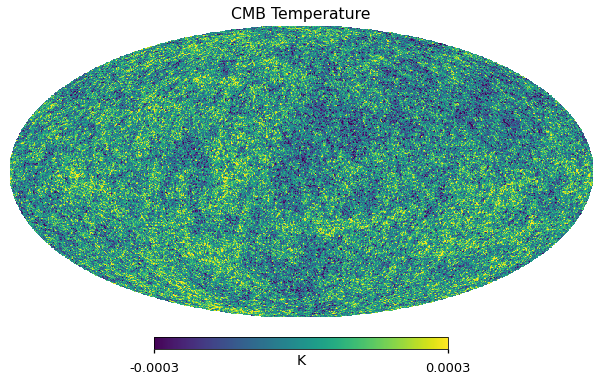

In [ ]:
hp.mollview(cmb_map, min=-300*1e-6, max=300*1e-6, unit="K", title="CMB Temperature")